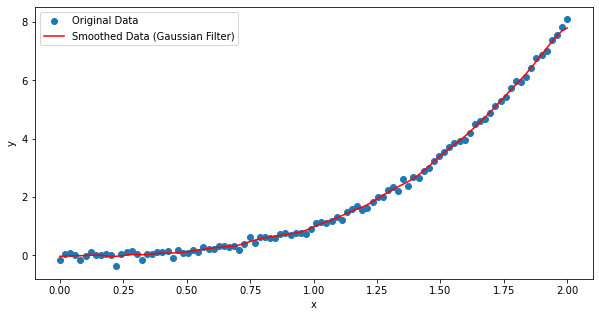

In [17]:
import numpy as np
from scipy.ndimage import gaussian_filter
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

# Generate synthetic data points with added noise
x = np.linspace(0, 2, 100)
y = x**3 + np.random.normal(0, 0.1, 100)

sigma = 2  
smoothed_y = gaussian_filter(y, sigma)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Original Data')
plt.plot(x, smoothed_y, color='red', label='Smoothed Data (Gaussian Filter)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [127]:
# Generate synthetic data points with added noise
x = np.linspace(0, 10, 1000)
y = np.sin(x) + np.random.normal(0, 0.01, 1000)

# Define the window size
window_size = 51

# Find the point with the most drastic change of tangent
max_tangent_change = -np.inf
max_tangent_index = None

previous_tangent = None

segment_size = len(x) // 3

In [138]:
def find_max_tangent_index(x, y, window_size):
    half_window = window_size // 2
    max_tangent_change = -np.inf
    max_tangent_index = None
    previous_tangent = None

    for i in range(half_window, len(x) - half_window):
        window_x = x[i - half_window : i + half_window + 1]
        window_y = y[i - half_window : i + half_window + 1]
        coeffs = np.polyfit(window_x, window_y, 1)
        #slope
        tangent = coeffs[0]  

        
        if previous_tangent is not None:
            tangent_change = abs(tangent - previous_tangent)

            if tangent_change > max_tangent_change:
                max_tangent_change = tangent_change
                max_tangent_index = i

        previous_tangent = tangent

    return max_tangent_index

In [129]:
x_filtered = x.copy()
y_filtered = y.copy()

# # Define a threshold based on a certain number of standard deviations from the mean
# threshold = 3

# # Calculate the mean and standard deviation of the data
# mean = np.mean(y_filtered)
# std = np.std(y_filtered)

# # Find the indices of points that are outside the threshold
# outlier_indices = np.where(np.abs(y_filtered - mean) > threshold * std)[0]

# # Remove the outlier points
# x_filtered = np.delete(x_filtered, outlier_indices)
# y_filtered = np.delete(y_filtered, outlier_indices)

In [130]:
# Find point with the max change in slope of tangent for each segment
segment_indices = [0, segment_size, 2 * segment_size]
max_tangent_indices = []

for i in segment_indices:
    segment_x = x_filtered[i:i+segment_size]
    segment_y = y_filtered[i:i+segment_size]
    max_tangent_index = find_max_tangent_index(segment_x, segment_y, window_size)
    max_tangent_indices.append(i + max_tangent_index)


In [132]:
def find_least_drastic_change_indices(x, y, max_tangent_indices, window_size):
    half_window = window_size // 2
    least_drastic_change_indices = []

    for i in range(len(max_tangent_indices)-1):
        start_index = max_tangent_indices[i] + half_window
        end_index = max_tangent_indices[i+1] - half_window

        segment_x = x[start_index:end_index+1]
        segment_y = y[start_index:end_index+1]

        min_tangent_change = np.inf
        min_tangent_index = None
        previous_tangent = None

        for j in range(half_window, len(segment_x) - half_window):
            # Get the x and y values within the window
            window_x = segment_x[j - half_window : j + half_window + 1]
            window_y = segment_y[j - half_window : j + half_window + 1]

            # Fit a linear regression line to the window data
            coeffs = np.polyfit(window_x, window_y, 1)
            tangent = coeffs[0]  # Slope of the linear regression line

            # Compute the difference between the current tangent and the previous tangent
            if previous_tangent is not None:
                tangent_change = abs(tangent - previous_tangent)

                if tangent_change < min_tangent_change:
                    min_tangent_change = tangent_change
                    min_tangent_index = start_index + j

            # Update the previous tangent for the next iteration
            previous_tangent = tangent

        if min_tangent_index is not None:
            least_drastic_change_indices.append(min_tangent_index)

    return least_drastic_change_indices

In [133]:
least_drastic_change_indices = find_least_drastic_change_indices(x_filtered, y_filtered, max_tangent_indices, window_size)

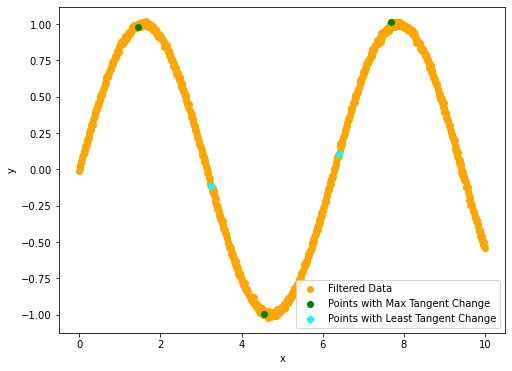

In [137]:
plt.figure(figsize=(8, 6))
# plt.scatter(x, y, label='Original Data', color='yellow')
plt.scatter(x_filtered, y_filtered, label='Filtered Data', color='orange')
plt.scatter(x_filtered[max_tangent_indices], y_filtered[max_tangent_indices], color='green', label='Points with Max Tangent Change')
plt.scatter(x_filtered[least_drastic_change_indices], y_filtered[least_drastic_change_indices], color='cyan', label='Points with Least Tangent Change')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()